# Drive

In [71]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [72]:
%cd /gdrive/MyDrive/ANDL/Homework_2

/gdrive/MyDrive/ANDL/Homework_2


# Libraries

In [73]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [74]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Load Data

In [75]:
X_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")

X_train.shape, y_train.shape

((2429, 36, 6), (2429,))

In [76]:
df = pd.DataFrame()

for t in range(0, 2429):
  temp_df = pd.DataFrame(X_train[t, :, :])
  temp_df["serie"] = t
  temp_df["target"] = y_train[t]
  df = pd.concat([df, temp_df])
df = df.rename(columns={0:"x0", 1:"x1", 2:"x2", 3:"x3", 4:"x4", 5:"x5"})
print(df)

          x0        x1        x2        x3        x4       x5  serie  target
0   17.59700   8.17130  -1.78420 -19.70600  -9.71350 -61.8870      0       0
1    0.22974  -5.89560  16.83700   5.03900   2.43320  58.9140      0       0
2  -29.65400 -21.29600  29.10300  -0.47503  75.39100  10.6650      0       0
3  -59.21000 -29.56500  17.97100 -45.60600  19.41200 -43.0140      0       0
4  -72.06400 -25.85500   0.46536 -59.15100 -29.10500 -11.9130      0       0
..       ...       ...       ...       ...       ...      ...    ...     ...
31   3.51190  -1.03240  -1.69900   4.15790   2.75430   5.9823   2428      11
32   0.70853  -0.94622  -1.91760   2.09480  -4.76750   7.4118   2428      11
33   0.20638   1.02870  -0.92512  -0.71633   1.73330   4.7638   2428      11
34   4.14290   1.09390  -0.18921   1.14100   0.93441   4.1742   2428      11
35  -1.55450  -1.21210   1.07050   1.32720   2.40100   8.4550   2428      11

[87444 rows x 8 columns]


In [77]:
features_column = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']

In [102]:
df_norm = pd.DataFrame()

for t in range(0, 2429):
  # save curret serie
  temp_df = pd.DataFrame()
  temp_df = df[df["serie"] == t]

  # Normalize the serie
  temp_df_norm = (temp_df[features_column]-temp_df[features_column].min())/(temp_df[features_column].max()-temp_df[features_column].min())
  temp_df[features_column] = temp_df_norm

  df_norm = pd.concat([df_norm, temp_df])
print(df_norm)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


          x0        x1        x2        x3        x4        x5  serie  target
0   0.570383  0.121649  0.006603  0.088272  0.015654  0.056883      0       0
1   0.497393  0.094747  0.016735  0.106097  0.016711  0.165313      0       0
2   0.371800  0.065296  0.023410  0.102125  0.023061  0.122005      0       0
3   0.247583  0.049483  0.017352  0.069616  0.018189  0.073823      0       0
4   0.193561  0.056578  0.007827  0.059859  0.013967  0.101740      0       0
..       ...       ...       ...       ...       ...       ...    ...     ...
31  0.638754  0.072296  0.026281  0.095643  0.088448  0.406646   2428      11
32  0.474766  0.074569  0.022268  0.066053  0.000000  0.417268   2428      11
33  0.445392  0.126646  0.040488  0.025733  0.076442  0.397593   2428      11
34  0.675665  0.128365  0.053999  0.052373  0.067048  0.393212   2428      11
35  0.342387  0.067558  0.077126  0.055043  0.084293  0.425019   2428      11

[87444 rows x 8 columns]


In [103]:
df.head(1000)

,x0,x1,x2,x3,x4,x5,serie,target
0,0.124296,0.167598,0.082792,0.076011,0.072832,0.056109,0,0
1,0.115532,0.166880,0.083455,0.076687,0.073126,0.058257,0,0
2,0.100452,0.166095,0.083892,0.076536,0.074890,0.057399,0,0
3,0.085537,0.165673,0.083495,0.075302,0.073536,0.056444,0,0
4,0.079050,0.165862,0.082872,0.074932,0.072363,0.056998,0,0
...,...,...,...,...,...,...,...,...
23,0.113113,0.167424,0.082915,0.077377,0.073153,0.058504,27,0
24,0.116771,0.167676,0.083102,0.076015,0.071857,0.056808,27,0
25,0.121208,0.167636,0.083576,0.076448,0.074675,0.058048,27,0
26,0.123463,0.167381,0.083368,0.077238,0.073269,0.058765,27,0


In [104]:
df_norm.head(1000)

,x0,x1,x2,x3,x4,x5,serie,target
0,0.570383,0.121649,0.006603,0.088272,0.015654,0.056883,0,0
1,0.497393,0.094747,0.016735,0.106097,0.016711,0.165313,0,0
2,0.371800,0.065296,0.023410,0.102125,0.023061,0.122005,0,0
3,0.247583,0.049483,0.017352,0.069616,0.018189,0.073823,0,0
4,0.193561,0.056578,0.007827,0.059859,0.013967,0.101740,0,0
...,...,...,...,...,...,...,...,...
23,0.248234,0.118479,0.061820,0.099074,0.084616,0.133728,27,0
24,0.319881,0.143905,0.083090,0.049812,0.044975,0.063861,27,0
25,0.406764,0.139863,0.137001,0.065475,0.131207,0.114933,27,0
26,0.450919,0.114124,0.113422,0.094055,0.088164,0.144455,27,0


In [81]:
df = df_norm

In [82]:
window = 36
stride = 36

In [83]:
def build_sequences(df, window=36, stride=36):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    for s in df['serie'].unique():
        # Take only meaningful features
        temp = df[df['serie'] == s][['x0', 'x1', 'x2', 'x3', 'x4', 'x5']].values
        # Save the label
        label = df[df['serie'] == s]['target'].values[0]
        # Compute padding length
        #padding_len = window - len(temp)%window
        # Create padding and concatenate it
        #padding = np.zeros((padding_len,6), dtype='float64')
        #temp = np.concatenate((temp,padding))
        # Build features windows with their corresponging labels
        idx = 0
        while idx+window <= len(temp):
            dataset.append(temp[idx:idx+window])
            labels.append(label)
            idx += stride
    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [84]:
X_train, y_train = build_sequences(df, window, stride)
X_train.shape, y_train.shape

((2429, 36, 6), (2429,))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train ,random_state=104, test_size=0.15, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2064, 36, 6), (2064,), (365, 36, 6), (365,))

In [86]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2064, 36, 6), (2064, 12), (365, 36, 6), (365, 12))

In [87]:
input_shape = X_train.shape[1:]
classes = y_train.shape[-1]
batch_size = 128
epochs = 200

In [88]:
def build_BiLSTM_classifier(input_shape, classes):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(input_layer)
    bilstm = tfkl.Bidirectional(tfkl.LSTM(128))(bilstm)
    dropout = tfkl.Dropout(.5, seed=seed)(bilstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [89]:
model = build_BiLSTM_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 36, 256)          138240    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 12)                1548  

In [90]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
15/15 [==============================] - 17s 689ms/step - loss: 2.1847 - accuracy: 0.3506 - val_loss: 1.9026 - val_accuracy: 0.5024 - lr: 0.0010
Epoch 2/200
15/15 [==============================] - 8s 526ms/step - loss: 1.5266 - accuracy: 0.5267 - val_loss: 1.1783 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 3/200
15/15 [==============================] - 8s 528ms/step - loss: 0.9900 - accuracy: 0.7033 - val_loss: 0.7718 - val_accuracy: 0.7295 - lr: 0.0010
Epoch 4/200
15/15 [==============================] - 8s 520ms/step - loss: 0.6564 - accuracy: 0.7824 - val_loss: 0.5165 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 5/200
15/15 [==============================] - 8s 519ms/step - loss: 0.4994 - accuracy: 0.8401 - val_loss: 0.5110 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 6/200
15/15 [==============================] - 8s 515ms/step - loss: 0.5038 - accuracy: 0.8460 - val_loss: 0.5577 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 7/200
15/15 [==============================] - 8s 518ms/s

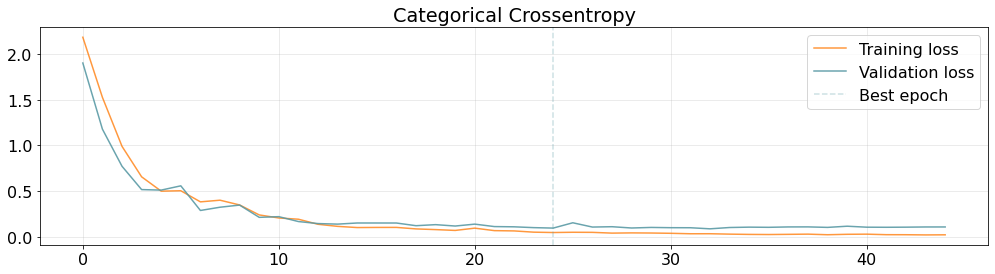

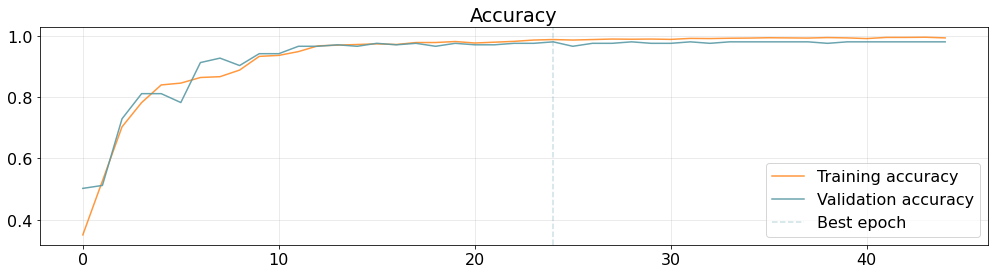

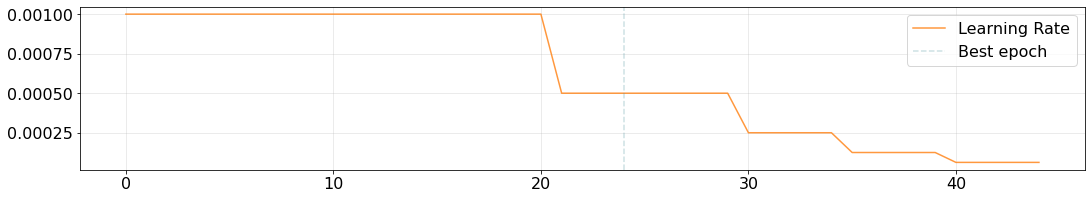

In [91]:
best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [94]:
model.save('new_df/BiLSTM/start_new_df_minmax_per_target')
# model = tfk.models.load_model('BiLSTM')

In [92]:
# Predict the test set with the BiLSTM
predictions = model.predict(X_test)
predictions.shape

12/12 [==============================] - 2s 74ms/step


(365, 12)

Accuracy: 0.9836
Precision: 0.9481
Recall: 0.9248
F1: 0.9321


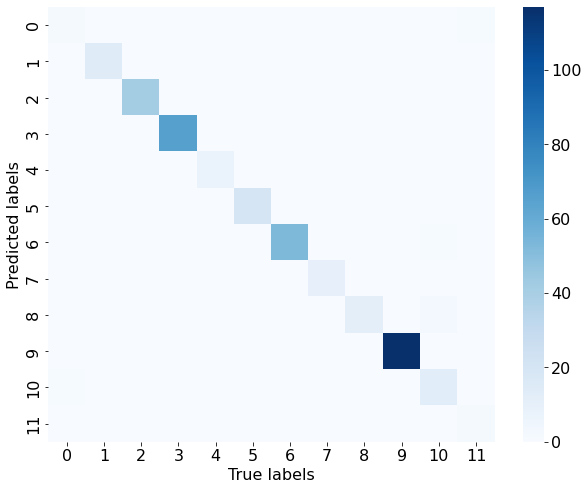

In [93]:
# Compute the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))

# Compute the classification metrics
accuracy = accuracy_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1))
precision = precision_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
recall = recall_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
f1 = f1_score(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1), average='macro')
print('Accuracy:',accuracy.round(4))
print('Precision:',precision.round(4))
print('Recall:',recall.round(4))
print('F1:',f1.round(4))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm.T, cmap='Blues', xticklabels=list([0,1,2,3,4,5,6,7,8,9,10,11]), yticklabels=list([0,1,2,3,4,5,6,7,8,9,10,11]))
plt.xlabel('True labels')
plt.ylabel('Predicted labels')
plt.show()